> **STUDENT STARTER VERSION**  
This notebook contains **TODO** markers where you must write code or add brief explanations.  
Please keep your outputs visible before exporting to PDF.

# COMP 4730 — Machine Learning  
## Lab 3: Feature Engineering & Selection with the Titanic Dataset

**Institution:** School of Computer Science — University of Windsor  
**Course:** COMP 4730  
**Instructor:** Dr. Sherif Saad  
**Student:** Matt Davies • 110121897

---

### Learning Objectives
- Load and explore a real-world dataset (Titanic).
- Handle missing data and encode categorical features.
- Engineer new features and reason about their utility.
- Apply simple feature selection methods (Filter, Wrapper, Embedded).
- Evaluate models before/after feature engineering.

> **Submission:** Upload this notebook (.ipynb) **and** a PDF export to Brightspace.


### Responsible Use of AI Tools (Disclosure Required)

You may use AI tools (ChatGPT, Copilot, Gemini) **for learning support** (error explanations, hints, clarifications).  
If used, add a short note in the **AI-Assistance Disclosure** section at the end describing:
- Which tool you used
- What you asked for
- What part is your own work

_Not acceptable:_ turning in code you do not understand or cannot explain.


In [2]:
# @title Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier

sns.set()
print("Libraries imported.")

Libraries imported.



## Part 1 — Load & Inspect the Titanic Dataset (20%)

**Tasks**
1. Load dataset using `seaborn.load_dataset("titanic")` into `df`.
2. Inspect shape, `head()`, `info()`, `describe(include="all")`.
3. Identify columns with missing values and types (continuous vs categorical).
4. Select initial working columns:  
   `pclass, sex, age, sibsp, parch, fare, embarked, survived`

_Add short notes on which features you expect to matter for survival and why._


In [3]:
# TODO: Load the Titanic dataset
df = sns.load_dataset("titanic")

print("Shape:", df.shape)
display(df.head())
print(df)

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
# TODO: Inspect structure and missing values
display(df.info())
display(df.describe(include="all"))
print("\nMissing values per column:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


The dataset contains missing values in three columns:
- age has 177 missing values (continuous),
- embarked has 2 missing values (categorical),
- deck has 688 missing values (categorical but mostly missing).

Age and fare are continuous numerical features, while pclass, sex, sibsp, parch, and embarked are categorical. Deck has too many missing values to be reliable and will be dropped later.


In [5]:
# TODO: Create a working copy with selected columns
target = "survived"
features = ["pclass","sex","age","sibsp","parch","fare","embarked"]
data = df[features + [target]].copy()
display(data.head())

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0



## Part 2 — Cleaning & Encoding (35% total; 20% cleaning + 15% encoding)

**Cleaning (20%)**
- Impute continuous: `age`, `fare` with **median**.
- Impute categorical: `embarked` with **mode**.
- Briefly justify imputation choices in a markdown cell.

**Encoding (15%)**
- One-hot encode `sex`, `embarked` with `pd.get_dummies(..., drop_first=True)`.
- Show resulting columns and briefly explain dummy variables.


In [ ]:
# TODO: Handle missing values
print("Before imputation:\n", data.isna().sum())

data["age"] = data["age"].fillna(data["age"].median())
data["fare"] = data["fare"].fillna(data["fare"].median())
data["embarked"] = data["embarked"].fillna(data["embarked"].mode()[0])

print("\nAfter imputation:\n", data.isna().sum())
display(data.head())

Before imputation:
 pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64

After imputation:
 pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [ ]:
# TODO: One-hot encode categorical features
cat_cols = ["sex","embarked"]
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print("Encoded columns:", list(data_encoded.columns))
display(data_encoded.head())

Encoded columns: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived', 'sex_male', 'embarked_Q', 'embarked_S']


,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True



## Part 3 — Feature Engineering (25%)

Create **at least two** new features, suggested:
- `family_size = sibsp + parch + 1`
- `is_alone = 1 if family_size == 1 else 0`
- `fare_per_person = fare / family_size`

_Add 1–3 lines each explaining why the feature may help predict survival._


In [ ]:
# TODO: Create engineered features
data_fe = data_encoded.copy()
data_fe["family_size"] = data_fe["sibsp"] + data_fe["parch"] + 1
data_fe["is_alone"] = (data_fe["family_size"] == 1).astype(int)
data_fe["fare_per_person"] = data_fe["fare"] / data_fe["family_size"]
display(data_fe.head())

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S,family_size,is_alone,fare_per_person
0,3,22.0,1,0,7.2500,0,True,False,True,2,0,3.62500
1,1,38.0,1,0,71.2833,1,False,False,False,2,0,35.64165
2,3,26.0,0,0,7.9250,1,False,False,True,1,1,7.92500
3,1,35.0,1,0,53.1000,1,False,False,True,2,0,26.55000
4,3,35.0,0,0,8.0500,0,True,False,True,1,1,8.05000



## Part 4 — Train/Test Split, Scaling, and Baselines (25%)

1. Split (80/20) with `stratify=y`.
2. Scale continuous features with `StandardScaler`:
   - Baseline: likely `age`, `fare`
   - With FE: `age`, `fare`, `family_size`, `fare_per_person`
3. Baseline model: Logistic Regression on encoded data **without** engineered features.
4. FE model: Logistic Regression on **engineered** feature set.
5. Compare metrics (accuracy + report); comment on changes.


In [ ]:
# Baseline (no engineered features)
data_baseline = data_encoded.copy()
y_base = data_baseline[target]
X_base = data_baseline.drop(columns=[target])

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42, stratify=y_base
)

continuous_cols_base = ["age","fare"]
scaler_base = StandardScaler()
Xb_train[continuous_cols_base] = scaler_base.fit_transform(Xb_train[continuous_cols_base])
Xb_test[continuous_cols_base] = scaler_base.transform(Xb_test[continuous_cols_base])

log_reg_base = LogisticRegression(max_iter=1000)
log_reg_base.fit(Xb_train, yb_train)
yb_pred = log_reg_base.predict(Xb_test)

print("Baseline accuracy:", accuracy_score(yb_test, yb_pred))
print("\nClassification report (baseline):\n", classification_report(yb_test, yb_pred))
print("\nConfusion matrix (baseline):\n", confusion_matrix(yb_test, yb_pred))

Baseline accuracy: 0.8044692737430168

Classification report (baseline):
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion matrix (baseline):
 [[98 12]
 [23 46]]


In [ ]:
# Feature-Engineered model
y = data_fe[target]
X = data_fe.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

continuous_cols = ["age","fare","family_size","fare_per_person"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

log_reg_fe = LogisticRegression(max_iter=1000)
log_reg_fe.fit(X_train_scaled, y_train)
y_pred = log_reg_fe.predict(X_test_scaled)

print("Feature-engineered accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report (FE):\n", classification_report(y_test, y_pred))
print("\nConfusion matrix (FE):\n", confusion_matrix(y_test, y_pred))

Feature-engineered accuracy: 0.8044692737430168

Classification report (FE):
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion matrix (FE):
 [[97 13]
 [22 47]]



## Part 5 — Simple Feature Selection (10%)

Use **one** method to rank features and try a reduced model:
- Filter: `mutual_info_classif`
- Wrapper: `RFE` with LogisticRegression
- Embedded: `SelectFromModel` with RandomForestClassifier (optional)

Train with the **top 8** features; compare accuracy vs. full model.


Top 15 features by MI:


,0
sex_male,0.179522
fare,0.167125
fare_per_person,0.133216
pclass,0.063381
age,0.054843
family_size,0.048888
is_alone,0.039366
embarked_S,0.032885
parch,0.029699
sibsp,0.018274


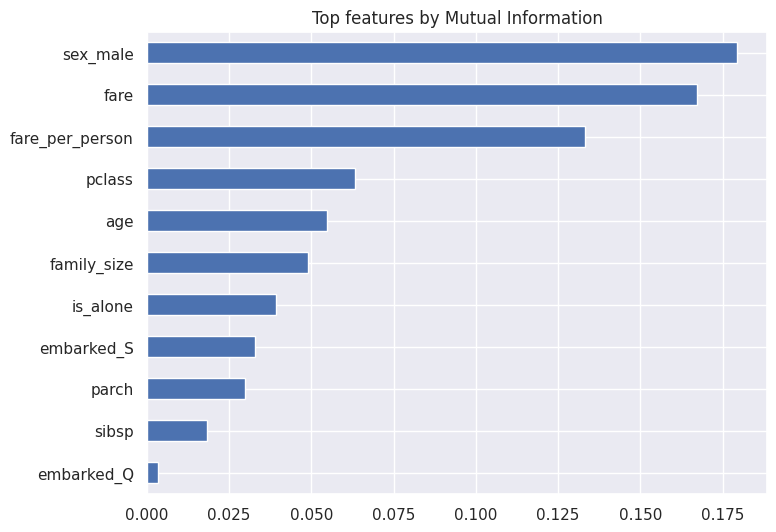

In [ ]:
# Mutual Information (Filter)
mi = mutual_info_classif(X_train_scaled, y_train, random_state=42)
mi_series = pd.Series(mi, index=X_train_scaled.columns).sort_values(ascending=False)
print("Top 15 features by MI:")
display(mi_series.head(15))

plt.figure(figsize=(8,6))
mi_series.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top features by Mutual Information")
plt.show()

In [ ]:
# RFE (Wrapper) with Logistic Regression
rfe_estimator = LogisticRegression(max_iter=1000)
rfe = RFE(rfe_estimator, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfe.support_]
print("Selected by RFE:", list(selected_features))

X_train_sel = X_train_scaled[selected_features]
X_test_sel = X_test_scaled[selected_features]

log_reg_sel = LogisticRegression(max_iter=1000)
log_reg_sel.fit(X_train_sel, y_train)
y_sel_pred = log_reg_sel.predict(X_test_sel)

print("Selected-feature accuracy:", accuracy_score(y_test, y_sel_pred))
print("\nClassification report (Selected):\n", classification_report(y_test, y_sel_pred))

Selected by RFE: ['pclass', 'age', 'sibsp', 'sex_male', 'embarked_Q', 'embarked_S', 'family_size', 'is_alone']
Selected-feature accuracy: 0.8044692737430168

Classification report (Selected):
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179




---

## Reflection (5%)

Answer briefly (3–6 lines each):
1. Which engineered feature(s) had the greatest impact? Why?
2. Did feature selection help performance or interpretability? Explain.
3. If you had more raw data, what new features would you create?



## AI-Assistance Disclosure (if applicable)

- Tool(s) used:  
- What I asked for:  
- How it helped:  
- What remains my own work:  



## Appendix (Optional)

Add any extra experiments here:
- Polynomial features
- RobustScaler vs StandardScaler
- RandomForest feature importances
